In [1]:
# Initialize the specified JVM
# from jpype import options as opt
# opt = ["-Xmx4G","-Djava.class.path=./moa.jar","-Djava.class.path=./weka.jar","-Djavaagent:sizeofag.jar"]

import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/anaconda/lib/python2.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/anaconda/lib/python2.7/site-packages/javabridge/jars/runnablequeue.jar', '/anaconda/lib/python2.7/site-packages/javabridge/jars/cpython.jar', '/anaconda/lib/python2.7/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda/lib/python2.7/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [2]:
help(jvm.start)

Help on function start in module weka.core.jvm:

start(class_path=None, bundled=True, packages=False, system_cp=False, max_heap_size=None)
    Initializes the javabridge connection (starts up the JVM).
    
    :param class_path: the additional classpath elements to add
    :type class_path: list
    :param bundled: whether to add jars from the "lib" directory
    :type bundled: bool
    :param packages: whether to add jars from Weka packages as well (bool) or an alternative Weka home directory (str)
    :type packages: bool or str
    :param system_cp: whether to add the system classpath as well
    :type system_cp: bool
    :param max_heap_size: the maximum heap size (-Xmx parameter, eg 512m or 4g)
    :type max_heap_size: str



In [3]:
help(jvm.stop)

Help on function stop in module weka.core.jvm:

stop()
    Kills the JVM.



In [7]:
data_dir = "/home/cetrulin/Desktop/Andres/data/"

In [8]:
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file(data_dir + "S&P500_2017-08-28_indicators.arff")
data.class_is_last()

print(data)

@relation S&P500_2017-08-28_indicators-weka.filters.unsupervised.attribute.Remove-R1

@attribute date {'2017-08-14 10:30:00','2017-08-14 10:31:00','2017-08-14 10:32:00','2017-08-14 10:33:00','2017-08-14 10:34:00','2017-08-14 10:35:00','2017-08-14 10:36:00','2017-08-14 10:37:00','2017-08-14 10:38:00','2017-08-14 10:39:00','2017-08-14 10:40:00','2017-08-14 10:41:00','2017-08-14 10:42:00','2017-08-14 10:43:00','2017-08-14 10:44:00','2017-08-14 10:45:00','2017-08-14 10:46:00','2017-08-14 10:47:00','2017-08-14 10:48:00','2017-08-14 10:49:00','2017-08-14 10:50:00','2017-08-14 10:51:00','2017-08-14 10:52:00','2017-08-14 10:53:00','2017-08-14 10:54:00','2017-08-14 10:55:00','2017-08-14 10:56:00','2017-08-14 10:57:00','2017-08-14 10:58:00','2017-08-14 10:59:00','2017-08-14 11:00:00','2017-08-14 11:01:00','2017-08-14 11:02:00','2017-08-14 11:03:00','2017-08-14 11:04:00','2017-08-14 11:05:00','2017-08-14 11:06:00','2017-08-14 11:07:00','2017-08-14 11:08:00','2017-08-14 11:09:00','2017-08-14 11:10

In [9]:
# http://pythonhosted.org/python-weka-wrapper/examples.html

# Build classifier incrementally with data and print model
# from weka.classifiers import Classifier
from weka.classifiers import PredictionOutput, KernelClassifier, Kernel, Evaluation
from weka.core.classes import Random

# data = loader.load_file(data_dir + "S&P500_2017-08-28_indicators.arff")
# data.class_is_last()

cls = KernelClassifier(classname="weka.classifiers.functions.SMOreg", options=["-N", "0"])
# cls = Classifier(classname='weka.classifiers.meta.MOA -B "moa.classifiers.functions.SGD -r 0.0 -o SQUAREDLOSS"')
# cls = Classifier(classname='weka.classifiers.functions.LinearRegression -S 0 -R 1.0E-8 -num-decimal-places 4')
# cls.build_classifier(data)
# for inst in loader:
#     cls.update_classifier(data)
kernel = Kernel(classname="weka.classifiers.functions.supportVector.RBFKernel", options=["-G", "0.1"])
cls.kernel = kernel
pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
evl = Evaluation(data)
evl.crossvalidate_model(cls, data, 10, Random(1), pout)

In [10]:
print(evl.summary())


Correlation coefficient                  0.9937
Mean absolute error                      0.0167
Root mean squared error                  0.0208
Relative absolute error                 14.0428 %
Root relative squared error             15.2855 %
Total Number of Instances             3180     



In [11]:
print(pout.buffer_content())

    inst#     actual  predicted      error
        1      8.076      8.039     -0.037 
        2      8.26       8.249     -0.011 
        3      8.315      8.323      0.008 
        4      8.1        8.066     -0.034 
        5      8.44       8.469      0.029 
        6      8.47       8.485      0.015 
        7      8.485      8.509      0.024 
        8      8.21       8.189     -0.021 
        9      8.06       8.025     -0.035 
       10      8.14       8.149      0.009 
       11      8.075      8.064     -0.011 
       12      8.44       8.454      0.014 
       13      8.47       8.475      0.005 
       14      8.265      8.259     -0.006 
       15      8.42       8.415     -0.005 
       16      8.43       8.457      0.027 
       17      8.11       8.095     -0.015 
       18      8.465      8.464     -0.001 
       19      8.037      8.038      0.001 
       20      8.345      8.363      0.018 
       21      8.43       8.423     -0.007 
       22      8.36       8.418  

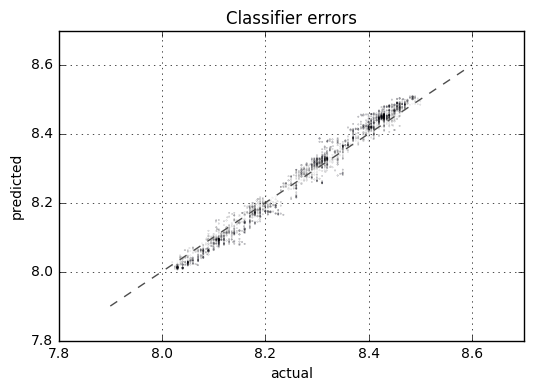

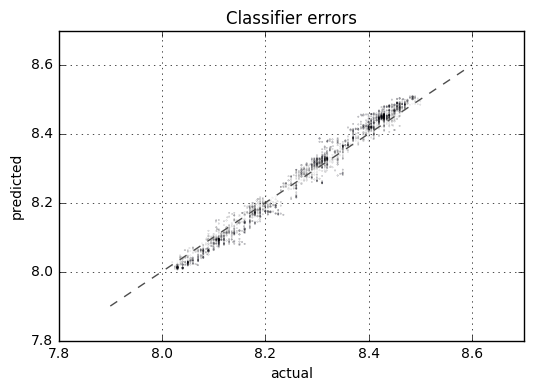

In [14]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_classifier_errors(evl.predictions, wait=True)